In [27]:
from convml_tt.data.dataset import ImageSingletDataset, TileType
from convml_tt.data.examples import ExampleData, fetch_example_dataset

from torch.utils.data import DataLoader
import torchvision.transforms as tv_transforms

import kornia.augmentation

import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
dataset_path = fetch_example_dataset(ExampleData.SMALL100)
dataset = ImageSingletDataset(data_dir=dataset_path, tile_type=TileType.ANCHOR)
batch_size=4
dl = DataLoader(dataset, batch_size=batch_size)

Using downloaded and verified file: data/Nx256_s200000.0_N0study_N100train.tgz
Extracting data/Nx256_s200000.0_N0study_N100train.tgz to data/


In [47]:
x_batch = next(iter(dl))
x_batch.shape

torch.Size([4, 3, 256, 256])

In [8]:
def get_image(tensor):
    return tv_transforms.ToPILImage()(tensor)

test_tensor = dataset[0]
test_tensor.shape

torch.Size([3, 256, 256])

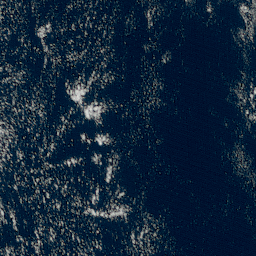

In [9]:
get_image(test_tensor)

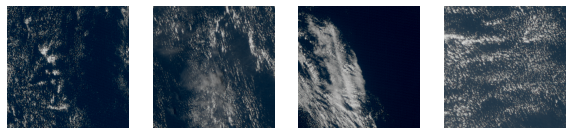

In [53]:
def show_batch(x_batch):
    nimg = x_batch.shape[0]
    fig, axes = plt.subplots(ncols=nimg, figsize=(10, 6))
    for i, ax in enumerate(axes):
        ax.imshow(get_image(x_batch[i]))
        ax.axison = False
        
show_batch(x_batch)

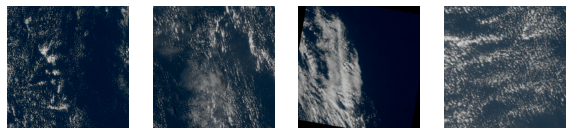

In [75]:
# attempting to duplicate the transforms used in original
# training (based on fastai v1 defaults): zoom and rotate
transform = kornia.augmentation.RandomAffine(degrees=10.0, scale=(1.0, 1.1))
show_batch(transform(x_batch))

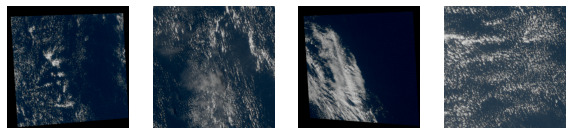

In [76]:
# attempting to duplicate the transforms used in original
# training (based on fastai v1 defaults): perspective
transform = kornia.augmentation.RandomPerspective(distortion_scale=0.2)
show_batch(transform(x_batch))

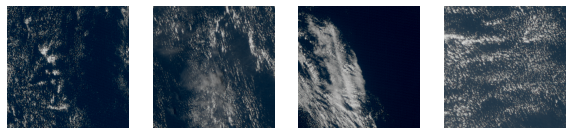

In [80]:
# attempting to duplicate the transforms used in original
# training (based on fastai v1 defaults): lighting
transform = kornia.augmentation.ColorJitter(brightness=0.2, contrast=0.2, p=0.25)
show_batch(transform(x_batch))

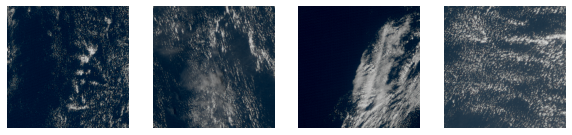

In [84]:
# attempting to duplicate the transforms used in original
# training (based on fastai v1 defaults): horizontal flip
transform = kornia.augmentation.RandomHorizontalFlip(p=0.5)
show_batch(transform(x_batch))

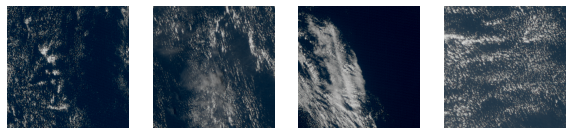

In [85]:
# attempting to duplicate the transforms used in original
# training (based on fastai v1 defaults): horizontal flip
transform = kornia.augmentation.RandomVerticalFlip(p=0.5)
show_batch(transform(x_batch))